<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/DBSCAN/FJP_DS_DBSCAN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def circle():
  X , y = make_circles(noise = 0.1 , factor = 0.3 , n_samples = 1500)
  X = X[y==0]
  y = y[y==0]
  return X , y

In [7]:
X1,y1 = circle()
X2 , y2 = circle()
X3 , y3 = circle()

In [8]:
n1 = np.random.rand(100 , 2)* 150 - 75
X1 *= 10
X2 *= 25
X3 *= 50

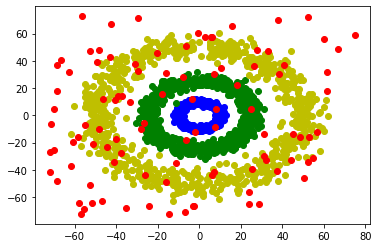

In [9]:
plt.scatter(X1[: , 0], X1[: , 1] , color = 'b')
plt.scatter(X2[: , 0], X2[: , 1] , color = 'g')

plt.scatter(X3[: , 0], X3[: , 1] , color = 'y')
plt.scatter(n1[: , 0], n1[: , 1] , color = 'r')


In [10]:
X = np.vstack([X1 , X2 ,X3 , n1])

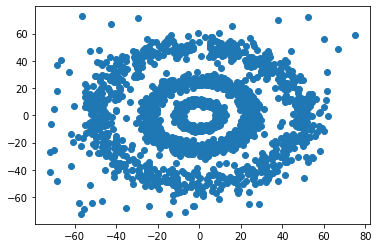

In [11]:
plt.scatter(X[: , 0 ] , X[: , 1])

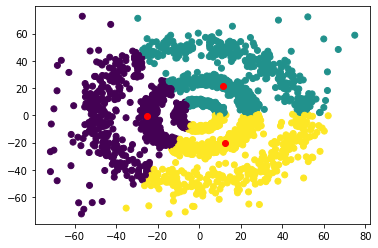

In [12]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[: , 0] , X[: , 1] , c = km.predict(X))
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[:, 1] , color = 'red')

In [13]:
from sklearn.cluster import DBSCAN 

from sklearn.preprocessing import MinMaxScaler 


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

db = DBSCAN(eps = 0.5 , min_samples = 5)


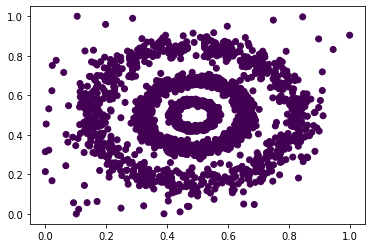

In [16]:
y_pred = db.fit_predict(X)
plt.scatter(X[: , 0] , X[: , 1] , c = y_pred)

In [17]:
from sklearn.neighbors import NearestNeighbors 

nn = NearestNeighbors(n_neighbors = 5)
nn.fit(X)

NearestNeighbors()

In [18]:
distance , index = nn.kneighbors(X)


In [19]:
distance

array([[0.        , 0.00244006, 0.00247323, 0.00261881, 0.00344175],
       [0.        , 0.00332844, 0.00358486, 0.00380625, 0.00470429],
       [0.        , 0.00671959, 0.00752419, 0.00775462, 0.00789574],
       ...,
       [0.        , 0.05098365, 0.0738036 , 0.1007278 , 0.10925706],
       [0.        , 0.00876587, 0.02010987, 0.02134756, 0.02338983],
       [0.        , 0.00731226, 0.0121977 , 0.0187021 , 0.02077593]])

In [20]:
index

array([[   0,  707,  454,   89,  169],
       [   1,  253,  686,  536,  307],
       [   2,  259,  144,  345,  419],
       ...,
       [2347, 2279, 2277, 2323, 2344],
       [2348, 1634, 2212, 1866, 2094],
       [2349, 2232, 1955, 2153, 1683]])

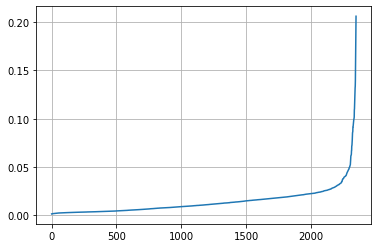

In [21]:
dis = distance[:, 4]
dis.sort()
plt.grid()
plt.plot(dis)

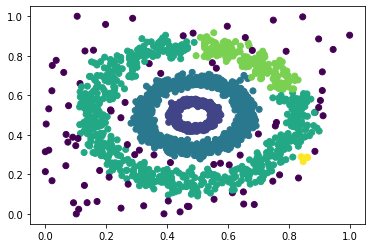

In [22]:
db = DBSCAN(eps=0.03, min_samples=5)
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

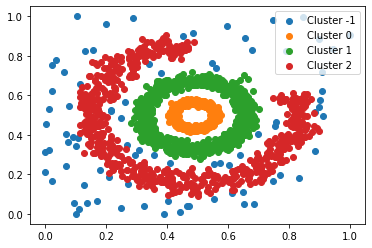

In [24]:
for i in [-1, 0, 1, 2]:
    plt.scatter(X[ y_pred==i, 0], X[y_pred==i, 1], label = 'Cluster {}'.format(i))

plt.legend()

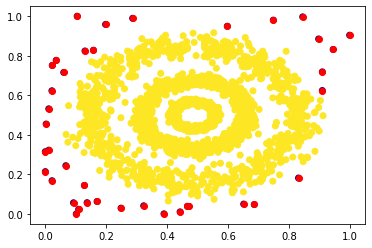

In [25]:
db = DBSCAN(eps=0.05, min_samples=5)
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

plt.scatter(X[ y_pred==-1, 0], X[y_pred==-1, 1], color = 'r')